## Exercises for the Iris Dataset

In [1]:
# Importing the Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (classification_report, confusion_matrix)
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# This is the matplotlib magic to see plots inline.
%matplotlib inline

# Initializing the Predictors and Target Variable for Classification
iris_df = pd.read_csv("Iris.csv")

del iris_df["Id"]

X = iris_df.loc[:, ["SepalLengthCm",
                    "SepalWidthCm",
                    "PetalLengthCm",
                    "PetalWidthCm"]]

y = iris_df.Species.values

### Dataset Overview

In [2]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


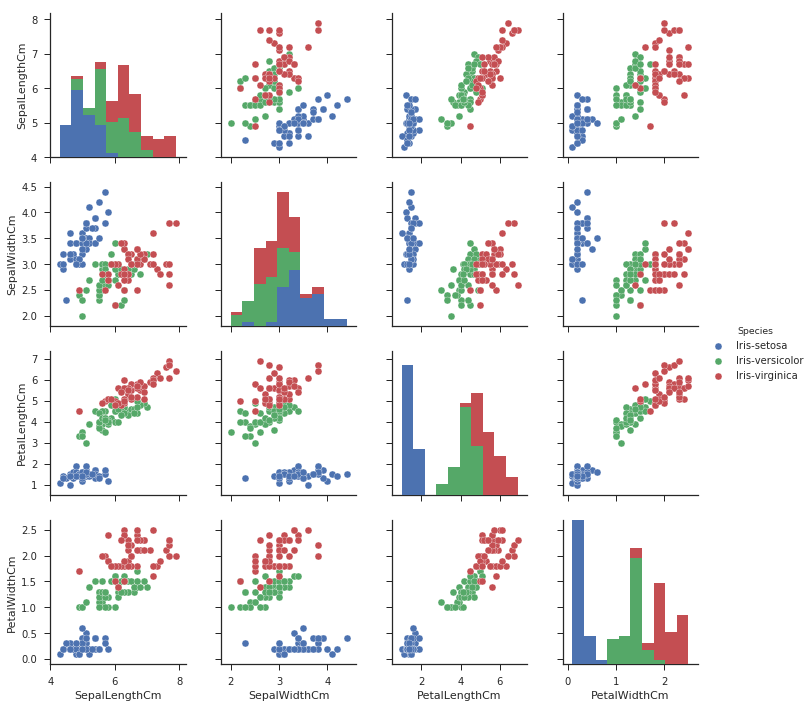

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris_df, hue="Species")

### E4 in Python:

In [5]:
# Train-test split and KNN Initialization
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(X_train, y_train)

# Storing the predictions
y_predicted = knn.predict(X_test)

# Report on Classification
print("Classification Report:\n")

print(classification_report(y_true=y_test, y_pred=y_predicted))

print("Confusion Matrix:\n")

confusion_matrix_as_dataframe = pd.DataFrame(
    confusion_matrix(y_true=y_test, y_pred=y_predicted),
    columns=knn.classes_,
    index=knn.classes_)

print(confusion_matrix_as_dataframe)

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

    avg / total       0.98      0.98      0.98        60

Confusion Matrix:

                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               23                0               0
Iris-versicolor            0               19               0
Iris-virginica             0                1              17


### E5 in Python:

In [6]:
# Initializing the KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the KMeans
kmeans.fit(X)

# Report on Centroids
cluster_centers_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
    index=[0, 1, 2])

print("Cluster Centroids:\n")

print(cluster_centers_df)

Cluster Centroids:

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       5.901613      2.748387       4.393548      1.433871
1       5.006000      3.418000       1.464000      0.244000
2       6.850000      3.073684       5.742105      2.071053


In [7]:
# Assigning labels from the output of KMeans
iris_df["clusters"] = kmeans.predict(X)

# Labels versus Clustering Results comparison
frequency_table = pd.crosstab(
    index=iris_df["clusters"], columns=iris_df["Species"]).\
    reindex(index = [1, 0, 2])

print("Labels and Clusters Comparison:\n")

print(frequency_table)

Labels and Clusters Comparison:

Species   Iris-setosa  Iris-versicolor  Iris-virginica
clusters                                              
1                  50                0               0
0                   0               48              14
2                   0                2              36


## Visualization of the Clusters:

In [1]:
# Initializing the column indices to plot (You can change those)
INDEX_X = 2
INDEX_Y = 3

# Getting the column names
iris_column_names = list(iris_df.columns)

# Visualising the clusters
plt.scatter(
    iris_df.ix[iris_df.clusters == 0, INDEX_X],
    iris_df.ix[iris_df.clusters == 0, INDEX_Y],
    s=50,
    c='orange',
    label='Cluster 0')
plt.scatter(
    iris_df.ix[iris_df.clusters == 1, INDEX_X],
    iris_df.ix[iris_df.clusters == 1, INDEX_Y],
    s=50,
    c='darkblue',
    label='Cluster 1')
plt.scatter(
    iris_df.ix[iris_df.clusters == 2, INDEX_X],
    iris_df.ix[iris_df.clusters == 2, INDEX_Y],
    s=50,
    c='purple',
    label='Cluster 2')

# Plotting the centroids of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, INDEX_X],
    kmeans.cluster_centers_[:, INDEX_Y],
    s=50,
    c='red',
    label='Centroids')

plt.xlabel(iris_column_names[INDEX_X])
plt.ylabel(iris_column_names[INDEX_Y])
plt.title("Clusters Graph")

plt.legend()

NameError: name 'iris_df' is not defined